In [26]:
!pip3 install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import torch
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
import numpy as np

In [28]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [29]:
!git clone https://github.com/jaddoescad/ants_and_bees.git



fatal: destination path 'ants_and_bees' already exists and is not an empty directory.


In [30]:
!ls

ants_and_bees  sample_data


In [31]:
!ls ants_and_bees

train  val


In [32]:
!ls ants_and_bees/train

ants  bees


In [33]:
!ls ants_and_bees/train/ants

 0013035.jpg		     408393566_b5b694119b.jpg
 1030023514_aad5c608f9.jpg   424119020_6d57481dab.jpg
 1095476100_3906d8afde.jpg   424873399_47658a91fb.jpg
 1099452230_d1949d3250.jpg   450057712_771b3bfc91.jpg
 116570827_e9c126745d.jpg    45472593_bfd624f8dc.jpg
 1225872729_6f0856588f.jpg   459694881_ac657d3187.jpg
 1262877379_64fcada201.jpg   460372577_f2f6a8c9fc.jpg
 1269756697_0bce92cdab.jpg   460874319_0a45ab4d05.jpg
 1286984635_5119e80de1.jpg   466430434_4000737de9.jpg
 132478121_2a430adea2.jpg    470127037_513711fd21.jpg
 1360291657_dc248c5eea.jpg   474806473_ca6caab245.jpg
 1368913450_e146e2fb6d.jpg   475961153_b8c13fd405.jpg
 1473187633_63ccaacea6.jpg   484293231_e53cfc0c89.jpg
 148715752_302c84f5a4.jpg    49375974_e28ba6f17e.jpg
 1489674356_09d48dde0a.jpg   506249802_207cd979b4.jpg
 149244013_c529578289.jpg    506249836_717b73f540.jpg
 150801003_3390b73135.jpg    512164029_c0a66b8498.jpg
 150801171_cd86f17ed8.jpg    512863248_43c8ce579b.jpg
 154124431_65460430f2.jpg    518773929_7

In [34]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)), # transforms iamge on affin space
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
    ]) # normalize mean value: 0.5, standard deviation: 0.5

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))
    ])
training_dataset = datasets.ImageFolder('ants_and_bees/train', transform=transform_train)
validation_dataset = datasets.ImageFolder('ants_and_bees/val', transform=transform)
# training_dataset

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=20, shuffle=True) # divide to smaller batches because training 60000 images at once is too big to process
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=20, shuffle=False)

In [35]:
print(len(training_dataset))
print(len(validation_dataset))

244
153


In [36]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  # print(image.shape)
  image = image.transpose(1, 2, 0) # 28, 28, 1
  # print(image.shape)
  # print('-------------original----------------')
  # print(image)
  # print('--------------change---------------')
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5)) # denormalize to show image, normalization is consist of subtract mean and divding by the standard deviation
                                                                        # to denormalize, multiply by standard deviation and add the mean
  # print(image)
  # print('----------------end-------------')
  image = image.clip(0, 1) # restric min and max values
  return image

In [37]:
classes = ('ant', 'bee')

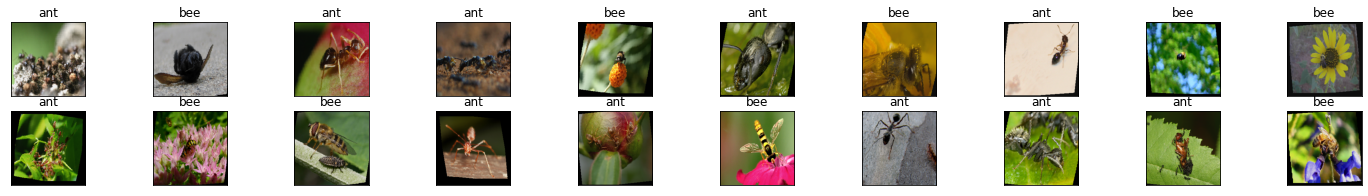

In [38]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 3))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(classes[labels[idx].item()])


In [39]:
model = models.alexnet(pretrained=True)
'''
class LeNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # input: 1, depth: 20, kernel size: 5, stride length: 1
    self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)
    self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
    self.fc1 = nn.Linear(4 * 4 * 64, 500)
    self.dropout1 = nn.Dropout(0.5)
    self.fc2 = nn.Linear(500, 10)
    
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2) # extract max feature of 2x2 size kernel
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2, 2)
    x = x.view(-1, 4*4*64) # -1 option of view function automatically calculate the remaining dimention
    x = x.view(-1, 4*4*64) # -1 option of view function automatically calculate the remaining dimention
    x = F.relu(self.fc1(x))
    x = self.dropout1(x)
    x = self.fc2(x)
    return x
'''

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


'\nclass LeNet(nn.Module):\n  def __init__(self):\n    super().__init__()\n    self.conv1 = nn.Conv2d(3, 16, 3, padding=1) # input: 1, depth: 20, kernel size: 5, stride length: 1\n    self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1)\n    self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)\n    self.fc1 = nn.Linear(4 * 4 * 64, 500)\n    self.dropout1 = nn.Dropout(0.5)\n    self.fc2 = nn.Linear(500, 10)\n    \n  def forward(self, x):\n    x = F.relu(self.conv1(x))\n    x = F.max_pool2d(x, 2, 2) # extract max feature of 2x2 size kernel\n    x = F.relu(self.conv2(x))\n    x = F.max_pool2d(x, 2, 2)\n    x = F.relu(self.conv3(x))\n    x = F.max_pool2d(x, 2, 2)\n    x = x.view(-1, 4*4*64) # -1 option of view function automatically calculate the remaining dimention\n    x = x.view(-1, 4*4*64) # -1 option of view function automatically calculate the remaining dimention\n    x = F.relu(self.fc1(x))\n    x = self.dropout1(x)\n    x = self.fc2(x)\n    return x\n'

In [40]:
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [41]:
for param in model.features.parameters():
  param.requires_grad = False

In [42]:
import torch.nn as normalization

n_inputs  = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model.classifier[6] = last_layer
model.to(device)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [44]:
epochs = 10
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

    
  else: # else section will be called after for loop
    with torch.no_grad(): # set all the grad flags to be false. It meams this block of codes doesn't affect grad.
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)

        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader.dataset)
    epoch_acc = running_corrects.float() / len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float() / len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch: ', e+1)
    print('training loss: {:.4f}, acc: {:.4f}'.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, acc: {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))


epoch:  1
training loss: 0.0293, acc: 0.6885
validation loss: 0.0176, acc: 0.8366
epoch:  2
training loss: 0.0157, acc: 0.8770
validation loss: 0.0164, acc: 0.8824
epoch:  3
training loss: 0.0152, acc: 0.9057
validation loss: 0.0162, acc: 0.8627
epoch:  4
training loss: 0.0087, acc: 0.9262
validation loss: 0.0167, acc: 0.9020
epoch:  5
training loss: 0.0071, acc: 0.9467
validation loss: 0.0181, acc: 0.8824
epoch:  6
training loss: 0.0065, acc: 0.9549
validation loss: 0.0189, acc: 0.8758
epoch:  7
training loss: 0.0047, acc: 0.9590
validation loss: 0.0158, acc: 0.8954
epoch:  8
training loss: 0.0047, acc: 0.9590
validation loss: 0.0189, acc: 0.8889
epoch:  9
training loss: 0.0039, acc: 0.9713
validation loss: 0.0199, acc: 0.8824
epoch:  10
training loss: 0.0039, acc: 0.9754
validation loss: 0.0174, acc: 0.9020


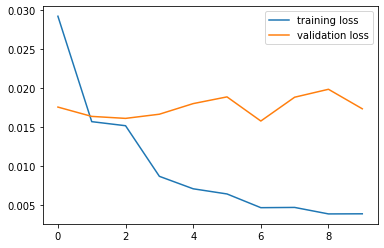

In [45]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

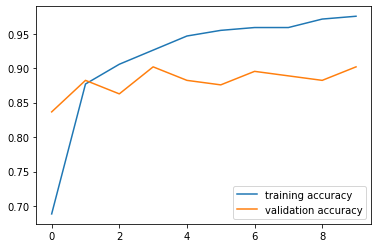

In [46]:
running_corrects_history = torch.tensor(running_corrects_history, device = 'cpu')
val_running_corrects_history = torch.tensor(val_running_corrects_history, device = 'cpu')
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label='validation accuracy')
plt.legend()

In [47]:
# !pip3 install pillow==4.0.0

<Response [200]>


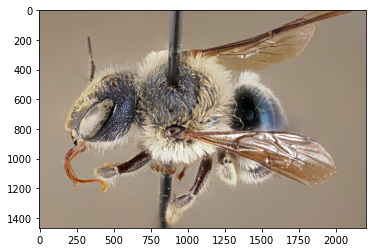

In [70]:
import PIL.ImageOps
import requests
from PIL import Image
# url = 'https://media.wired.co.uk/photos/606da27d20fc96acca6d3cb1/master/w_1600,c_limit/ants.jpg'
url = 'https://www.floridamuseum.ufl.edu/wp-content/uploads/sites/23/2020/05/2-O.-calaminthae-photo-taken-by-Chase-Kimmel.jpg'
response = requests.get(url, stream = True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

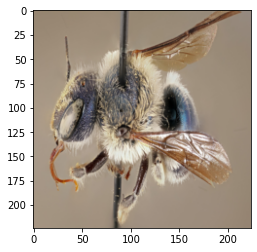

In [71]:
img = transform(img) # resize and normalize
plt.imshow(im_convert(img))

In [72]:
image = img.to(device).unsqueeze(0)
image.shape

torch.Size([1, 3, 224, 224])

In [73]:
output = model(image)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

bee


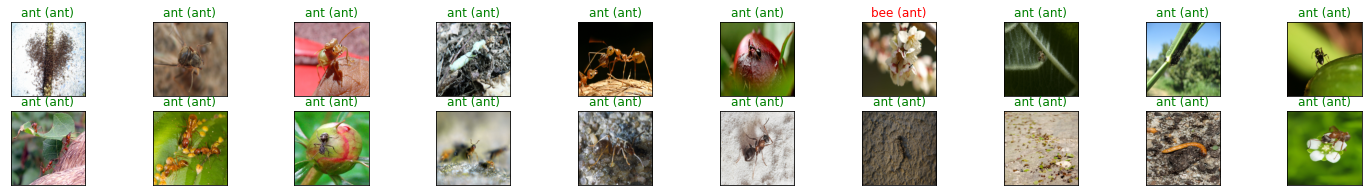

In [74]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 3))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title('{} ({})'.format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color = ('green' if preds[idx] == labels[idx] else 'red'))